<input type="" value="XGBoost Classifier Example" style="width:100%;height:60px;background-color:blue;color:white;padding:5px;font-size:25px;border:none;padding:8px;text-align:center">

__XGBoost__ stands for e<b><u>X</b></u>tream <b><u>G</b></u>radient, <b><u>B</b></u>oosting. This Notebook will show how to implement the code to train a model and generate a binary file that will then be used to deploy an API.

For information on this XGBoost refer to this [xgboost](https://machinelearningmastery.com/gentle-introduction-xgboost-applied-machine-learning/).

## Loading Prerequisites
&#x1F4A1; If you work on your laptop, before executing this notebook make sure you have the following packages intalled `xgboost`, `sklearn`, `pandas` and `seaborn`:

```python
import sys
sys.path.append('C:\Localdata\csi_ada')
```

In [1]:
from xgboost import XGBClassifier

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
df = pd.read_csv('data.csv')
df.head()

,X0,X1,X2,X3,X4,X5,X6,X7,Y
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, random_state=0, shuffle=False)

In [7]:
classifier_model = XGBClassifier(
    learning_rate=0.1,
    n_estimators=140,
    max_depth=5,
    min_child_weight=1,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='binary:logistic',
    scale_pos_weight=1,
    seed=27)

In [8]:
param_test = {
 'max_depth':[3, 4, 5],
 'learning_rate': [0.1, 0.2, 0.5],
 'n_estimators': [50, 100, 110, 120, 130, 140],
 'min_child_weight':range(1,6,2)
}

In [9]:
grid_search = GridSearchCV(
    estimator=classifier_model, 
    param_grid = param_test,
    scoring='recall', #'roc_auc' | f1
    n_jobs=4,
    cv=5)
grid_search.fit(X=X_train, y=y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=0.8, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=5, min_child_weight=1,
                                     missing=None, n_estimators=140, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=27, silent=None,
                                     subsample=0.8, verbosity=1),
             iid='deprecated', n_jobs=4,
             param_grid={'learning_rate': [0.1, 0.2, 0.5],
                         'max_depth': [3, 4, 5],
                         'min_child_weight': range(1, 6, 2),
         

In [10]:
y_predicted = grid_search.best_estimator_.predict(data=X_test)

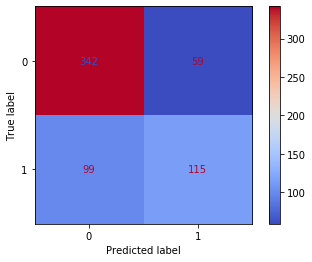

In [11]:
plot_confusion_matrix(estimator=grid_search.best_estimator_, X=X_test, y_true=y_test, cmap='coolwarm', values_format='.4g')